In [1]:
import pandas as pd
import cptac
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import statsmodels.stats.multitest as ssm

In [2]:
files = glob.glob('transmutation_effects_permutations/*.csv')
files

['transmutation_effects_permutations\\ccrcc_BAP1_mutation_effects_permutation.csv',
 'transmutation_effects_permutations\\ccrcc_KDM5C_mutation_effects_permutation.csv',
 'transmutation_effects_permutations\\ccrcc_PBRM1_mutation_effects_permutation.csv',
 'transmutation_effects_permutations\\ccrcc_SETD2_mutation_effects_permutation.csv',
 'transmutation_effects_permutations\\en_ARID1A_mutation_effects_permutation.csv',
 'transmutation_effects_permutations\\en_CTCF_mutation_effects_permutation.csv',
 'transmutation_effects_permutations\\en_CTNNB1_mutation_effects_permutation.csv',
 'transmutation_effects_permutations\\en_KMT2B_mutation_effects_permutation.csv',
 'transmutation_effects_permutations\\en_KRAS_mutation_effects_permutation.csv',
 'transmutation_effects_permutations\\en_PIK3CA_mutation_effects_permutation.csv',
 'transmutation_effects_permutations\\en_PIK3R1_mutation_effects_permutation.csv',
 'transmutation_effects_permutations\\en_TP53_mutation_effects_permutation.csv',
 'tr

In [3]:
dfs = []
for file in files:
    df = pd.read_csv(file)
    mutated_gene = file.split('_')[3]
    df['mutated_gene'] = [mutated_gene]*len(df)
    dfs.append(df)
df = pd.concat(dfs)
dfs = []
#correct the p-values
for cancer in pd.unique(df.cancer):
    cancer_df = df[df.cancer == cancer]
    p_values = ssm.multipletests(cancer_df.delta_correlation_pval)[1]
    cancer_df.delta_correlation_pval = p_values    
    cancer_df.sig_delta_corr_pval = cancer_df.delta_correlation_pval <= 0.05
    dfs.append(cancer_df)
df = pd.concat(dfs)
df

C:\Users\nanel\anaconda3\lib\site-packages\statsmodels\stats\multitest.py:162: RuntimeWarning: invalid value encountered in greater
  notreject = pvals > alphacSidak_all
C:\Users\nanel\anaconda3\lib\site-packages\statsmodels\stats\multitest.py:256: RuntimeWarning: invalid value encountered in greater
  pvals_corrected[pvals_corrected>1] = 1
C:\Users\nanel\anaconda3\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
C:\Users\nanel\anaconda3\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.py

,Unnamed: 0,gene,mutated_correlation,non_mutated_correlation,non_mutated_p_vals,mutated_p_vals,delta_correlation,delta_correlation_pval,cancer,sig_mut_pvals,sig_wt_pvals,sig_delta_corr_pval,mutated_gene
0,0,A1BG,-0.148959,-0.056002,5.939081e-01,0.568276,-0.092957,1.0,ccrcc,False,False,False,BAP1
1,1,A1CF,0.868087,0.894054,1.703768e-33,0.000006,-0.025967,1.0,ccrcc,False,True,False,BAP1
2,2,A2M,0.160459,0.013361,8.988528e-01,0.538421,0.147098,1.0,ccrcc,False,False,False,BAP1
3,3,AAAS,0.286736,0.104553,3.185816e-01,0.264496,0.182183,1.0,ccrcc,False,False,False,BAP1
4,4,AACS,0.521260,0.599482,2.166903e-10,0.031893,-0.078222,1.0,ccrcc,False,True,False,BAP1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10060,10060,ZXDC,0.239121,0.208572,9.814131e-02,0.296517,0.030549,1.0,luad,False,False,False,ZFHX4
10061,10061,ZYG11B,0.407153,0.608459,1.685411e-09,0.028371,-0.201306,1.0,luad,False,True,False,ZFHX4
10062,10062,ZYX,0.364392,0.428245,6.656714e-05,0.051967,-0.063853,1.0,luad,False,False,False,ZFHX4
10063,10063,ZZEF1,0.739059,0.647048,6.734598e-11,0.000005,0.092010,1.0,luad,True,True,False,ZFHX4


In [4]:
sig_corr_change = df[df.sig_delta_corr_pval]
sig_corr_change

,Unnamed: 0,gene,mutated_correlation,non_mutated_correlation,non_mutated_p_vals,mutated_p_vals,delta_correlation,delta_correlation_pval,cancer,sig_mut_pvals,sig_wt_pvals,sig_delta_corr_pval,mutated_gene
4337,4337,LAIR1,0.139702,0.707566,8.944858e-13,0.619492,-0.567864,0.002865,ccrcc,False,True,True,BAP1
6878,6878,RAMP3,0.449873,0.899788,1.258004e-15,0.263388,-0.449916,0.002222,ccrcc,False,True,True,BAP1
6355,6355,PMVK,-0.151750,0.722070,6.646295e-16,0.535148,-0.873820,0.000880,ccrcc,False,True,True,KDM5C
9324,9324,UGT1A10,-0.819930,0.825868,2.046821e-07,0.045718,-1.645799,0.000228,ccrcc,False,True,True,KDM5C
3410,3410,GAS2,-0.157000,0.579503,3.427498e-07,0.308787,-0.736504,0.004030,ccrcc,False,True,True,PBRM1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5756,5756,NOS3,0.174765,0.883730,1.920169e-26,0.330677,-0.708965,0.006830,luad,False,True,True,KRAS
7651,7651,SCGB3A2,0.359527,0.865921,3.143502e-21,0.024579,-0.506394,0.048666,luad,False,True,True,RYR2
9067,9067,TPPP3,0.584994,0.891158,1.700440e-28,0.000685,-0.306165,0.003540,luad,False,True,True,USH2A
3354,3354,GDA,-0.152258,0.897740,1.471006e-08,0.718898,-1.049998,0.001292,luad,False,True,True,ZFHX4


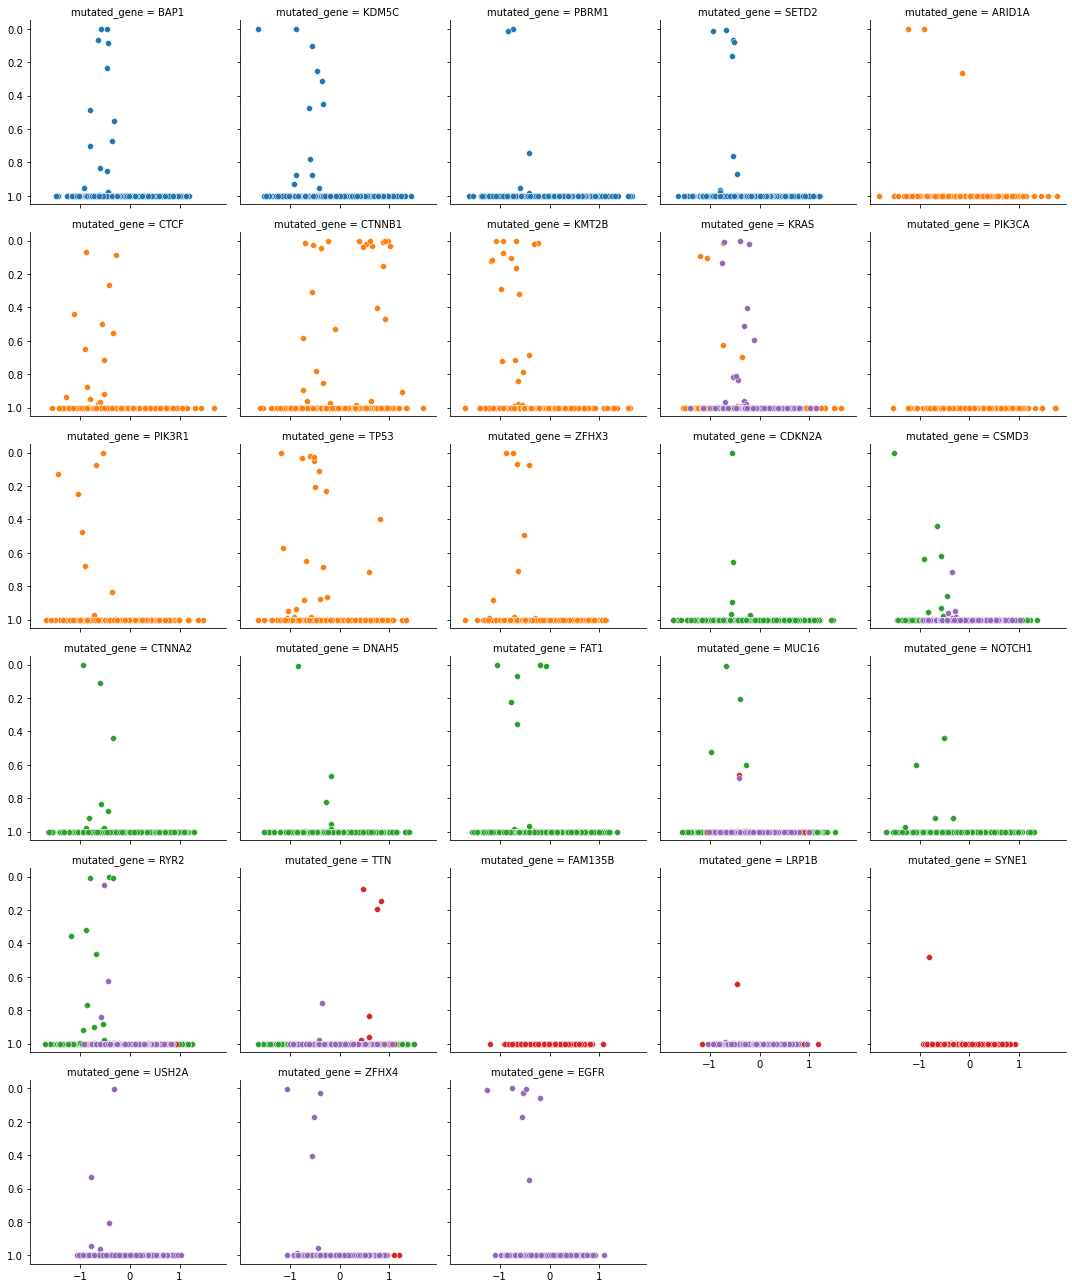

In [5]:
g = sns.FacetGrid(data = df, col = 'mutated_gene', hue = 'cancer', col_wrap = 5)
g.map_dataframe(sns.scatterplot, x = 'delta_correlation', y = 'delta_correlation_pval')
plt.gca().invert_yaxis()


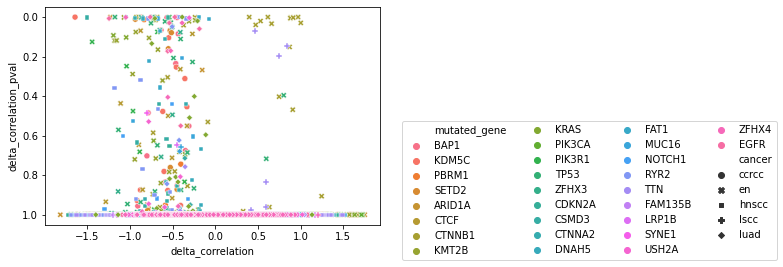

In [6]:
sns.scatterplot(data = df, x = 'delta_correlation', y = 'delta_correlation_pval', hue = 'mutated_gene', style = 'cancer')
plt.gca().invert_yaxis()
plt.legend(bbox_to_anchor=(1.1, 0., 1.1, 0.5), ncol = 4)
plt.show()

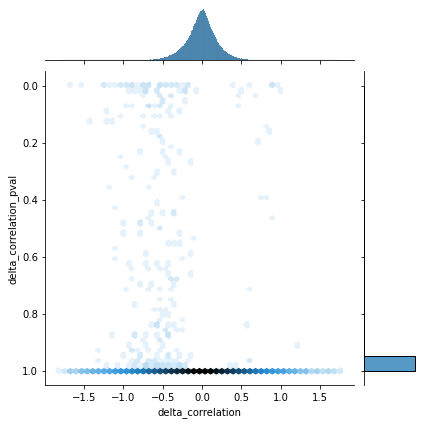

In [20]:
sns.jointplot(data = df, x = 'delta_correlation', y = 'delta_correlation_pval', kind = 'hex', bins = 'log')
plt.gca().invert_yaxis()